# Chapter 02 Applied Exercises

8. This exercise relates to the College data set, which can be found in the file College.csv on the book website. It contains a number of variables for 777 different universities and colleges in the US.

- Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data

In [2]:
import pandas as pd
data = pd.read_csv('datasets/College.csv')
data.head

<bound method NDFrame.head of                          Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28  

- Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later

In [3]:
data2 = pd.read_csv('datasets/College.csv', index_col=0)
data3 = data.rename({'Unnamed: 0' : 'College'}, axis = 1)
data3 = data3.set_index('College')
data = data3

- Use the describe() method of to produce a numerical summary of the variables in the data set

In [4]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


- Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll].
Recall that you can reference a list C of columns of a data frame A using A[C]

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

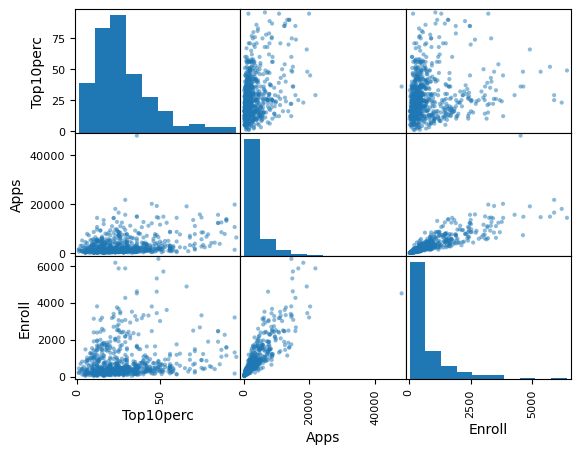

In [5]:
pd.plotting.scatter_matrix(data[['Top10perc', 'Apps', 'Enroll']])

- Use the boxplot() method of college to produce side-by-side boxplots of Outstate versus Private

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

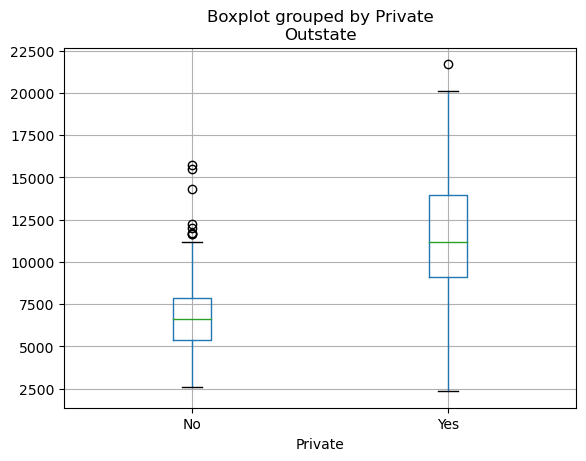

In [9]:
data.boxplot('Outstate', by= 'Private')

- Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%

In [32]:
data['Elite'] = pd.cut(data['Top10perc'], bins=[0, 50, 100], labels=['No', 'Yes'])

- Use the value_counts() method of college['Elite'] to see how many elite universities there are. Finally, use the boxplot() method again to produce side-by-side boxplots of Outstate versus Elite.

In [33]:
data.Elite.value_counts()

Top10perc
Yes    3
No     0
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

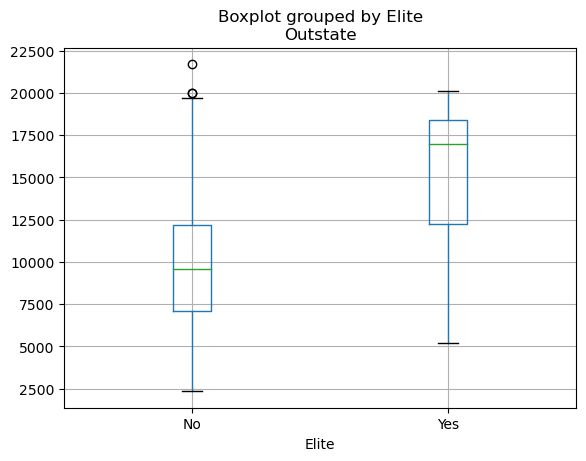

In [34]:
data.boxplot('Outstate', by='Elite')

- Use the plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

array([<Axes: title={'center': 'PhD'}>], dtype=object)

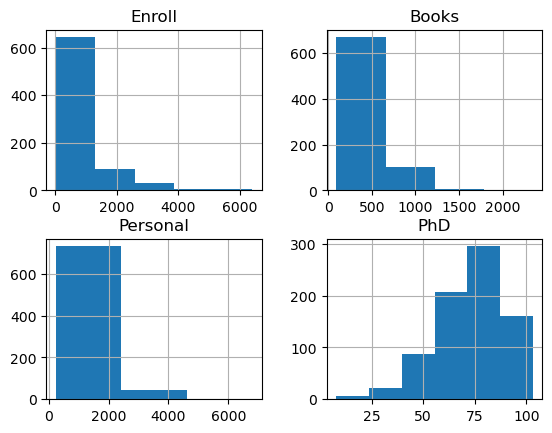

In [37]:
from matplotlib.pyplot import subplots

fig, ax = subplots(2,2)

data.hist('Enroll', bins= 5, ax = ax[0,0])
data.hist('Books', bins= 4, ax = ax[0,1])
data.hist('Personal', bins= 3, ax = ax[1,0])
data.hist('PhD', bins= 6, ax = ax[1,1])